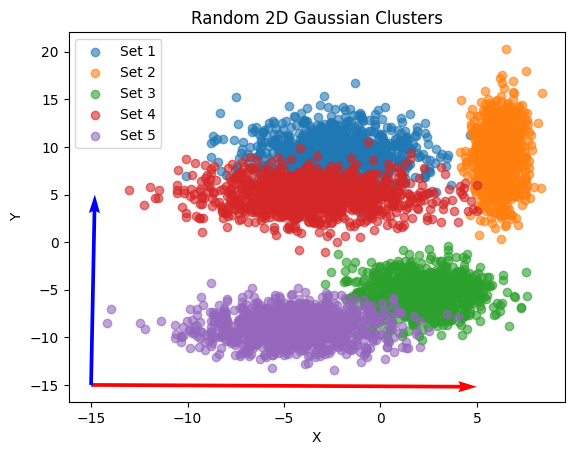

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_sets = 5          # number of Gaussian clusters
points_per_set = 1000 # points per cluster
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility

all_data = []
all_means = []

# Create the plot
fig, ax = plt.subplots()

for i in range(num_sets):
    # Random mean and standard deviation
    mean = np.random.uniform(-10, 10, size=dim)
    std = np.random.uniform(0.5, 3.0, size=dim)

    # Generate Gaussian-distributed data
    data = np.random.normal(loc=mean, scale=std, size=(points_per_set, dim))
    all_data.append(data)

    # Plot each cluster
    plt.scatter(data[:, 0], data[:, 1], label=f'Set {i+1}', alpha=0.6)

for data in all_data:
    X_centered = data - np.mean(data, axis=0)
    S = X_centered.T @ X_centered
    eigvals, eigvecs = np.linalg.eig(S)

# Define the origin for the vectors (all starting at (0,0))
origin_x = [-15, -15]
origin_y = [-15, -15]

# Define the components of the vectors (u and v for quiver)
u_components = [eigvecs[0,0], eigvecs[0,1]]
v_components = [eigvecs[1,0], eigvecs[1,1]]

ax.quiver(origin_x, origin_y, u_components, v_components,
          color=['r', 'b'], angles='xy', scale_units='xy', scale=0.05)

plt.title('Random 2D Gaussian Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Path to your .txt file
input_file = "C:/Users/IdeRy/Downloads/fighters_stats.txt"
output_file = "C:/Users/IdeRy/Downloads/fighters_stats.csv"

# Read the entire file
with open(input_file, "r", encoding="utf-8") as f:
    content = f.read().strip()

# Split data by blank lines (each block is one fighter)
fighters_data = content.split("\n\n")

# Parse each fighter’s data
fighters_list = []
for fighter in fighters_data:
    fighter_dict = {}
    lines = fighter.strip().split("\n")
    for line in lines:
        if ":" in line:
            key, value = line.split(":", 1)
            key = key.strip()
            value = value.strip()
            # Convert numeric values where possible
            try:
                value = float(value)
                if value.is_integer():
                    value = int(value)
            except ValueError:
                pass
            fighter_dict[key] = value
    fighters_list.append(fighter_dict)

# Convert to DataFrame
df = pd.DataFrame(fighters_list)

# Save to CSV
df.to_csv(output_file, index=False)

print(f"✅ CSV saved as '{output_file}'")
print(df.head())  # preview


✅ CSV saved as 'C:/Users/IdeRy/Downloads/fighters_stats.csv'
               name  wins  losses  height  weight   reach    stance age  SLpM  \
0      Amanda Ribas    12       5  160.02   56.70  167.64  Orthodox  30  4.63   
1    Rose Namajunas    13       6  165.10   56.70   165.1  Orthodox  31  3.69   
2     Karl Williams    10       1  190.50  106.59  200.66  Orthodox  34  2.87   
3       Justin Tafa     7       4  182.88  119.75  187.96  Southpaw  30  4.09   
4  Edmen Shahbazyan    13       4  187.96   83.91   190.5  Orthodox  26  3.60   

   sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  
0         0.40  3.40     0.61    2.07    0.51    0.85      0.7  
1         0.41  3.51     0.63    1.38    0.47    0.59      0.5  
2         0.52  1.70     0.60    4.75    0.50    1.00      0.2  
3         0.54  5.02     0.47    0.00    0.00    0.50      0.0  
4         0.52  4.09     0.45    2.24    0.38    0.63      0.6  


In [1]:
import pandas as pd
output_file = "C:/Users/IdeRy/Downloads/fighters_stats.csv"

df = pd.read_csv(output_file)
df = df.dropna()
df = df.groupby('name').mean(numeric_only =True).get(["wins", "SLpM", "sig_str_acc", "SApM", "str_def", "td_avg", "td_acc", "td_def","sub_avg"])
# df = df.T
df


,wins,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
name,,,,,,,,,
AJ Cunningham,11.0,7.66,0.29,11.90,0.48,0.00,0.00,0.33,0.0
AJ Dobson,7.0,4.29,0.46,5.31,0.46,1.67,0.75,0.65,0.3
AJ Fletcher,10.0,3.36,0.49,4.61,0.46,1.54,0.35,0.33,0.9
Aalon Cruz,8.0,7.58,0.39,8.88,0.58,0.00,0.00,0.00,0.0
Aaron Phillips,12.0,1.51,0.53,3.66,0.43,0.86,0.50,0.44,0.6
...,...,...,...,...,...,...,...,...,...
Zhang Mingyang,17.0,9.23,0.57,6.39,0.57,0.00,0.00,0.00,0.0
Zhang Tiequan,15.0,1.23,0.36,2.14,0.51,1.95,0.58,0.75,3.4
Zhang Weili,24.0,5.94,0.51,3.44,0.53,2.29,0.42,0.66,0.4


In [2]:
df.to_numpy()[0]

array([11.  ,  7.66,  0.29, 11.9 ,  0.48,  0.  ,  0.  ,  0.33,  0.  ])

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import zscore

# Copy + mean-center
df_copy = df.copy() # we copy to avoid modifying the original dataframe
means = df_copy.mean().to_list() # we compute the means of each column
df_copy = df_copy - means # we subtract the means from each column to center the data on the mean

# Compute z-scores for each numerical column (outlier deletion step 1)
z_scores = np.abs(zscore(df_copy, nan_policy='omit'))

# Set threshold for outlier detection (outlier deletion part 2)
threshold = 3

# Keep only rows where all z-scores are below the threshold (outlier deletion step 3)
df_pruned = df_copy[(z_scores < threshold).all(axis=1)]

# Calculating covariance matrix and its eigenvalues/vectors
X = df_pruned.to_numpy() # Convert to numpy 
S = X.T @ X # We don't need to normalize by n-1 for PCA; scalar multiples do not affect eigenvectors
eigvals, eigvecs = np.linalg.eig(S) # eigenvalue decomposition

# Sort by descending eigenvalue
idx = np.argsort(eigvals)[::-1] # np.argsort sorts INDICES that WOULD SORT the array in ascending order; [::-1] reverses the order
eigvals = eigvals[idx] # sorted eigenvalues
eigvecs = eigvecs[:, idx] # sorted eigenvectors

# Top 3 components
W = eigvecs[:, :3]
X_pca = X @ W

In [9]:
eigvals

array([7.86727751e+04, 4.51122584e+03, 2.11195658e+03, 1.48995519e+03,
       5.50821258e+02, 7.67558918e+01, 6.19665730e+01, 1.08668113e+01,
       5.09642018e+00])

In [ ]:
# Create dictionary of Labels vs. Eigenvector Weights
pca_weights_1 = dict(zip(df_pruned.columns, W[:, 0])) # zip() creates an abstract object that combies information from both 'df_prunced.columns' and 'W[:, 0]'
pca_weights_2 = dict(zip(df_pruned.columns, W[:, 1])) # dict() automatically 'unzips' the information with the first argument as keys and the second as values
pca_weights_3 = dict(zip(df_pruned.columns, W[:, 2])) # We do this 3 times for our 3 principal components!

# Extract most critical columns based on eigenvector weight

keys_1 = list(pca_weights_1.keys())
values_1 = list(pca_weights_1.values())
sorted_value_index_1 = np.argsort(values_1) # Again, np.argsort gives indices that would sort the array in ascending order
sorted_dict_1 = {keys_1[i]: values_1[i] for i in sorted_value_index_1}
crit_cols_1 = str(list(sorted_dict_1.keys())[:3]) + " (1)"

keys_2 = list(pca_weights_2.keys())
values_2 = list(pca_weights_2.values())
sorted_value_index_2 = np.argsort(values_2)
sorted_dict_2 = {keys_2[i]: values_2[i] for i in sorted_value_index_2}
crit_cols_2 = str(list(sorted_dict_2.keys())[:3]) + " (2)"

keys_3 = list(pca_weights_3.keys())
values_3 = list(pca_weights_3.values())
sorted_value_index_3 = np.argsort(values_1)
sorted_dict_3 = {keys_3[i]: values_3[i] for i in sorted_value_index_3}
crit_cols_3 = str(list(sorted_dict_3.keys())[:3]) + " (3)"

In [11]:
# Create DataFrame for visualization
pca_df = pd.DataFrame({
    crit_cols_1: X_pca[:, 0],
    crit_cols_2: X_pca[:, 1],
    crit_cols_3: X_pca[:, 2],
    'Fighter': df_pruned.index,
    'Wins': df_pruned.get('wins') + means[0]
})

# 3D scatter plot
fig = px.scatter(
    pca_df,
    x=crit_cols_1,
    y=crit_cols_2,
    #z=crit_cols_3,
    hover_name='Fighter',       # main hover label
    hover_data={'Wins': True},  # extra data to show
    title='UFC Dataset: PCA 3D Projection',
    width=800,
    height=700
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

In [14]:
W

array([[ 9.98964209e-01, -3.62120063e-02,  1.08532931e-02],
       [-3.62995606e-03, -6.36719250e-01, -4.81162191e-01],
       [ 1.62927094e-04, -3.50929993e-03, -2.40931069e-02],
       [-3.94559502e-02, -6.43263236e-01, -7.96805702e-02],
       [ 2.17440592e-03,  4.13802833e-03, -3.87118062e-03],
       [ 1.69922388e-02,  4.05163610e-01, -8.67910160e-01],
       [ 4.30172805e-03,  3.00435470e-02, -6.98110892e-02],
       [ 3.77450264e-03, -2.42151142e-02, -4.20291913e-02],
       [ 1.32029911e-02,  1.17531787e-01, -3.88922705e-02]])